In [1]:
!pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d kumaresanmanickavelu/lyft-udacity-challenge

100% 5.11G/5.11G [04:15<00:00, 21.9MB/s]
100% 5.11G/5.11G [04:15<00:00, 21.5MB/s]


In [6]:
!unzip lyft-udacity-challenge

Streaming output truncated to the last 5000 lines.
  inflating: datac/dataC/CameraSeg/02_00_004.png  
  inflating: datac/dataC/CameraSeg/02_00_005.png  
  inflating: datac/dataC/CameraSeg/02_00_014.png  
  inflating: datac/dataC/CameraSeg/02_00_015.png  
  inflating: datac/dataC/CameraSeg/02_00_024.png  
  inflating: datac/dataC/CameraSeg/02_00_025.png  
  inflating: datac/dataC/CameraSeg/02_00_034.png  
  inflating: datac/dataC/CameraSeg/02_00_035.png  
  inflating: datac/dataC/CameraSeg/02_00_044.png  
  inflating: datac/dataC/CameraSeg/02_00_045.png  
  inflating: datac/dataC/CameraSeg/02_00_054.png  
  inflating: datac/dataC/CameraSeg/02_00_055.png  
  inflating: datac/dataC/CameraSeg/02_00_064.png  
  inflating: datac/dataC/CameraSeg/02_00_065.png  
  inflating: datac/dataC/CameraSeg/02_00_074.png  
  inflating: datac/dataC/CameraSeg/02_00_075.png  
  inflating: datac/dataC/CameraSeg/02_00_084.png  
  inflating: datac/dataC/CameraSeg/02_00_085.png  
  inflating: datac/dataC/Camera

In [7]:
c = 0

In [8]:
import os
import glob
import numpy as np
import cv2
import shutil
import matplotlib.pyplot as plt


if c == 1:
  shutil.rmtree('dataset')
  c = 0

if c == 0:
  os.mkdir('dataset')
  os.mkdir('dataset/X_data')
  os.mkdir('dataset/Y_data')
  c = c+1

list_dirs = ['./dataA/dataA', './dataB/dataB', './dataC/dataC' , './dataD/dataD']
for dir in list_dirs:
  pathX = dir + '/CameraRGB'
  pathY = dir + '/CameraSeg'
  Xdata = glob.glob(pathX + '/*.png')
  Ydata = glob.glob(pathY + '/*.png')
  for index, img in enumerate(Xdata):
    img_name = f'{index}.png'
    image = cv2.imread(img)
    # image = image[:, 100:-100, :]
    reshaped_img = cv2.resize(image,(128, 128), 3)
    # cv2 works on BGR images
    rgb_img = cv2.cvtColor(reshaped_img, cv2.COLOR_BGR2RGB)
    filename = os.path.join('dataset/X_data' , img_name)
    cv2.imwrite(filename, rgb_img)

  for index, img in enumerate(Ydata):
    img_name = f'{index}.png'
    image = cv2.imread(img)
    reshaped_img = cv2.resize(image,(128, 128))[:, :, 2]
    # cv2 works on BGR images
    filename = os.path.join('dataset/Y_data' , img_name)
    cv2.imwrite(filename, reshaped_img)
  main_dir = str(dir.split('/')[1])
  shutil.rmtree(main_dir)

In [9]:
image_path = 'dataset/X_data/' 
mask_path = 'dataset/Y_data/'
image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
image_list = [image_path+i for i in image_list]
mask_list = [mask_path+i for i in mask_list]

In [10]:
import imageio
print(mask_list[2])
a = imageio.imread(mask_list[2])
print(a.shape)

dataset/Y_data/239.png
(128, 128)


Text(0.5, 1.0, 'Segmentation')

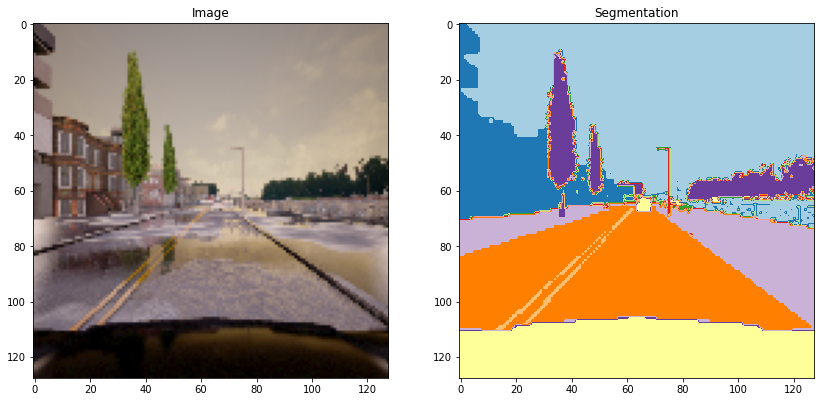

In [11]:
import imageio
import cv2
import matplotlib.pyplot as plt
N = 130
img = cv2.imread(image_list[N])
mask = cv2.imread(mask_list[N])
#  so we have to convert it to segmentation image
# finding the value of the pixel
mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask, cmap='Paired')
arr[1].set_title('Segmentation')

In [12]:
labels = ['Unlabeled','Building','Fence','Other',
          'Pedestrian', 'Pole', 'Roadline', 'Road',
          'Sidewalk', 'Vegetation', 'Car','Wall',
          'Traffic sign']

print(len(labels))

13


In [13]:
# def imgs_masks(image_path, mask_path):
#   img = imageio.imread(image_path)
#   # only deal with road_mask
#   seg_img = imageio.imread(mask_path)
#   mask = np.zeros((img.shape[0], img.shape[1], 3))
#   mask[seg_img == 7] = 1

#   return img, mask

In [14]:
# # forming X and Y data
# X = np.zeros((len(mask_list), 128, 128, 3))
# y = np.zeros((len(mask_list), 128, 128, 3))

# for i in range(len(mask_list)):
#   X[i] , y[i] = imgs_masks(image_list[i], mask_list[i])


In [15]:
# forming X and Y data
X = np.zeros((len(mask_list), 128, 128, 3))
y = np.zeros((len(mask_list), 128, 128))

for i in range(len(mask_list)):
  X[i] = imageio.imread(image_list[i])
  y[i] = imageio.imread((mask_list[i]))

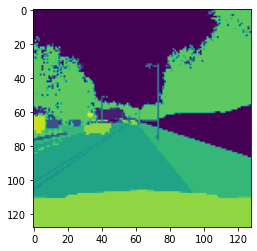

In [16]:
plt.imshow(y[0])

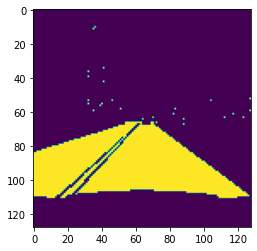

In [17]:
# ROAD
road = np.zeros((128, 128))
road[mask == 7]=1
plt.imshow(road)

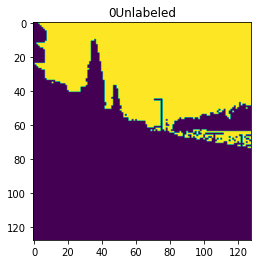

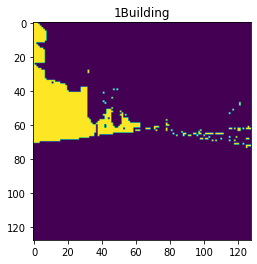

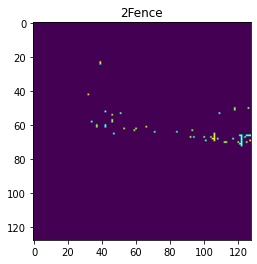

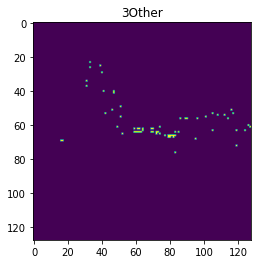

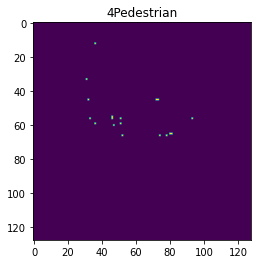

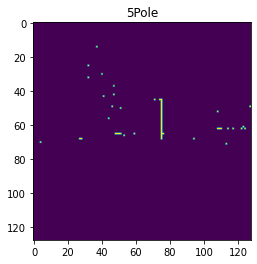

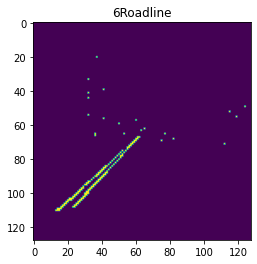

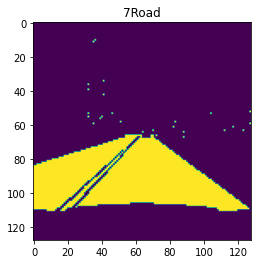

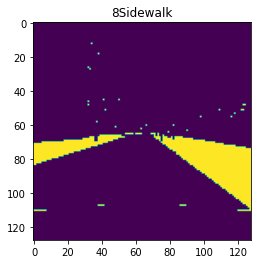

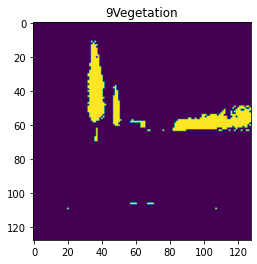

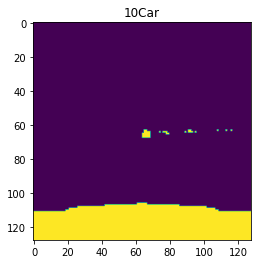

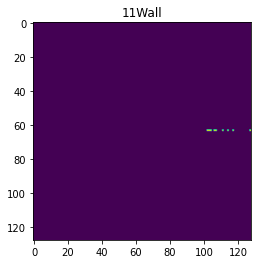

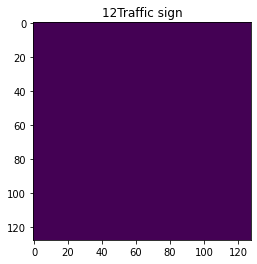

In [18]:
for i in range(len(labels)):
  sample_img = plt.imread('dataset/Y_data/100.png')
  zero = np.zeros((128, 128))
  zero[mask == i] = 255
  plt.title(f'{i}{labels[i]}')
  plt.imshow(zero)
  plt.show()

In [19]:
def make_coordinates(image, line_parameters):
  try:
    slope, intercept = line_parameters # unpacking
    if np.absolute(slope) < 0.0001 or np.absolute(slope) > 1000:
      slope = 0.01
  except:
    slope, intercept = 0.01, 0.0

  y1 = image.shape[0]
  y2 = int(y1*(3/5))
  x1 = int((y1 - intercept)/slope)
  x2 = int((y2 - intercept)/slope)
  return np.array([x1, y1, x2, y2])


def average_slope_intercept(image, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    x1, y1, x2, y2 = line.reshape(4)
    parameters = np.polyfit((x1, x2), (y1, y2), 1)
    # as polyfit is not working well
    if x2-x1 != 0:
      slope = (y2 - y1)/(x2- x1)
      intercept = y1 - (slope*x1)
    else:
      slope = parameters[0]
      intercept = parameters[1]
    
    if slope > 0:
      left_fit.append((slope, intercept))
    else:
      right_fit.append((slope, intercept))

  left_fit_average = np.average(left_fit, axis = 0)
  right_fit_average = np.average(right_fit, axis = 0)
  #  we need  coordinates to make line
  right_line_coordinates = make_coordinates(image, right_fit_average)
  left_line_coordinates = make_coordinates(image, left_fit_average)

  return np.array([left_line_coordinates, right_line_coordinates])

In [20]:
#  detecting lanes 
import cv2
import imageio

def find_lanes(image_path, segmented_image_path):
  img = cv2.imread(segmented_image_path)
  real_img = cv2.imread(image_path)
  img_copy = np.copy(real_img)
  seg_img = np.array([max(img[i, j]) for i in range(img.shape[0]) for j in range(img.shape[1])]).reshape(img.shape[0], img.shape[1])
  lane_mask = np.zeros(seg_img.shape)
  lane_mask[seg_img == 7] = 1
  blur = cv2.Sobel(lane_mask ,cv2.CV_64F,1,0,ksize=5)
  blur_copy = np.uint8(blur)
  lines = cv2.HoughLinesP(blur_copy, 2, np.pi/180, threshold = 90, maxLineGap = 5, minLineLength = 55)
  if lines is not None:
    averaged_lines = average_slope_intercept(lane_mask, lines)
    for line in averaged_lines:
      x1, y1, x2, y2 = line.reshape(4)
      cv2.line(img_copy , (x1, y1), (x2, y2), (255, 255, 255), thickness = 2)
  return img_copy

In [21]:
a = find_lanes(image_list[43], mask_list[43])

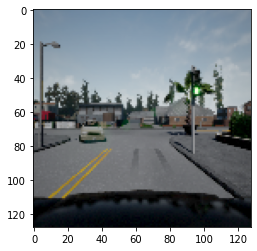

In [22]:
plt.imshow(a)

In [42]:
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 1.5 MB/s 


In [43]:
imageplot = np.zeros((len(mask_list), 128, 128, 3))
for i in range(len(mask_list)):
  img = find_lanes(image_list[i], mask_list[i])
  # gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imageplot[i] = img

imageio.mimwrite('steer.mp4', imageplot)

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-20-dd54edc85cd6>:16: RankWarning: Polyfit may be poorly conditioned
  averaged_lines = average_slope_intercept(lane_mask, lines)
<ipython-input-20-dd54edc85cd6>:16: RankWarning: Polyfit may be poorly conditioned
  averaged_lines = average_slope_intercept(lane_mask, lines)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
print(type(image_list))

<class 'list'>


In [26]:
image_height = 128
image_width = 128
image_channels = 3

FORMING U-NET

In [27]:
import tensorflow as tf

In [28]:
input = tf.keras.layers.Input((image_width, image_height, image_channels))

s = tf.keras.layers.Lambda(lambda x: x/255)(input)
# encoder 
# 1

c1 = tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(s)
d1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(d1)
m1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

# 2

c2 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(m1)
d2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(d2)
m2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

# 3

c3 = tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(m2)
d3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(d3)
m3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

# 4

c4 = tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(m3)
d4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(d4)
m4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

# 5

c5 = tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(m4)
d5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation = 'relu', kernel_initializer = 'he_normal')(d5)


In [29]:
# decoders( UPSAMPLING LAYERS)

# 1
u5 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides = (2,2), padding = 'same')(c5)
u5 = tf.keras.layers.concatenate([u5, c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', kernel_initializer= 'he_normal', padding = 'same')(u5)
d6 = tf.keras.layers.Dropout(0.1)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', kernel_initializer= 'he_normal', padding = 'same')(d6)

# 2 

u4 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides = (2,2), padding = 'same')(c6)
u4 = tf.keras.layers.concatenate([u4, c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', kernel_initializer= 'he_normal', padding = 'same')(u4)
d7 = tf.keras.layers.Dropout(0.1)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', kernel_initializer= 'he_normal', padding = 'same')(d7)

#  3

u3 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides = (2,2), padding = 'same')(c7)
u3 = tf.keras.layers.concatenate([u3, c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', kernel_initializer= 'he_normal', padding = 'same')(u3)
d8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', kernel_initializer= 'he_normal', padding = 'same')(d8)

# 4

u3 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides = (2,2), padding = 'same')(c8)
u3 = tf.keras.layers.concatenate([u3, c1])
c9 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer= 'he_normal', padding = 'same')(u3)
d9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer= 'he_normal', padding = 'same')(d9)

output = tf.keras.layers.Conv2D(len(labels), (1,1), activation = 'sigmoid')(c9)

model = tf.keras.Model(inputs = [input], outputs = [output])

In [30]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [31]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('segmentation_anuj_model.h5', verbose=1, save_best_only=True)
]
history = model.fit(X_train, y_train, epochs=100,  validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 16s 128ms/step - loss: 1.9349 - accuracy: 0.2937 - val_loss: 1.7232 - val_accuracy: 0.3107
Epoch 2/100
25/25 [==============================] - 2s 88ms/step - loss: 1.4845 - accuracy: 0.4645 - val_loss: 1.2410 - val_accuracy: 0.5831
Epoch 3/100
25/25 [==============================] - 2s 88ms/step - loss: 1.0403 - accuracy: 0.6713 - val_loss: 0.8940 - val_accuracy: 0.7243
Epoch 4/100
25/25 [==============================] - 2s 88ms/step - loss: 0.7994 - accuracy: 0.7313 - val_loss: 0.7752 - val_accuracy: 0.7586
Epoch 5/100
25/25 [==============================] - 2s 89ms/step - loss: 0.6981 - accuracy: 0.7812 - val_loss: 0.6647 - val_accuracy: 0.8066
Epoch 6/100
25/25 [==============================] - 2s 89ms/step - loss: 0.6387 - accuracy: 0.8083 - val_loss: 0.6356 - val_accuracy: 0.8173
Epoch 7/100
25/25 [==============================] - 2s 90ms/step - loss: 0.5874 - accuracy: 0.8311 - val_loss: 0.5636 - val_accuracy: 0.8447
Epoc

In [32]:
Pdata = glob.glob('/content/dataE/dataE/CameraRGB' + '/*.png')
print(len(Pdata))
X_val = np.zeros((len(Pdata), 128, 128, 3))
for index, img in enumerate(Pdata):
  img_name = f'{index}.png'
  image = cv2.imread(img)
  reshaped_img = cv2.resize(image,(128, 128), 3)
  # cv2 works on BGR images
  rgb_img = cv2.cvtColor(reshaped_img, cv2.COLOR_BGR2RGB)  
  X_val[index] = rgb_img

1000


In [33]:
p = model.predict(X_val)   # p is array containing array of 1000 segmented arrays of shape (128, 128, 13) means 13 different classes

32/32 [==============================] - 1s 25ms/step


In [34]:
print(p[0][:, :, 12].shape)

(128, 128)


In [35]:
road_seg = p[324][:, : ,7]
print(road_seg)

[[0.06567337 0.01587288 0.0212607  ... 0.03553339 0.06931114 0.07522073]
 [0.06821926 0.01241546 0.02019053 ... 0.01077864 0.02594092 0.05105098]
 [0.0700148  0.01283098 0.02540786 ... 0.00679536 0.0280251  0.02781134]
 ...
 [0.99986863 1.         1.         ... 1.         0.9999995  0.9996277 ]
 [0.9998876  0.9999999  1.         ... 0.9999999  0.99999535 0.99931073]
 [0.9986394  0.9999931  0.9999943  ... 0.9999664  0.9998479  0.9945135 ]]


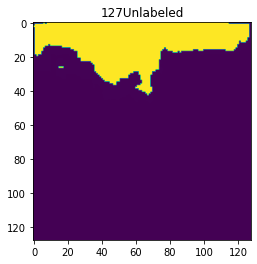

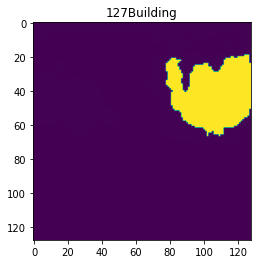

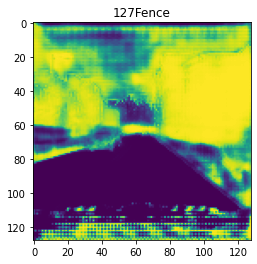

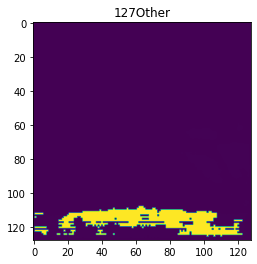

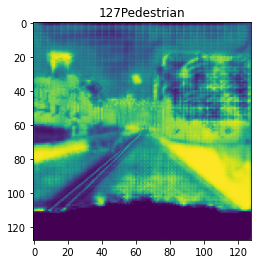

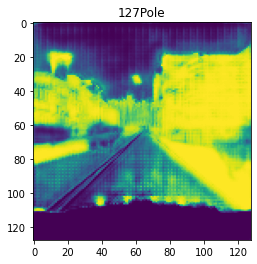

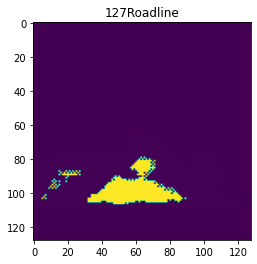

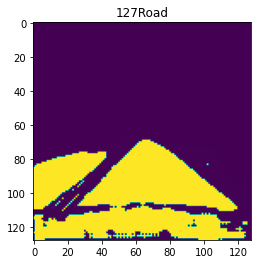

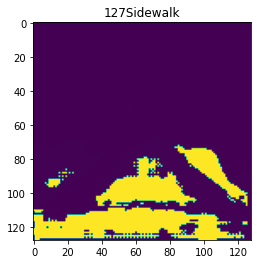

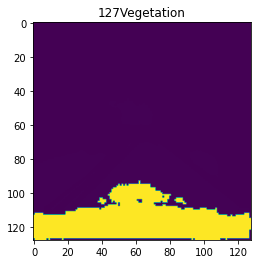

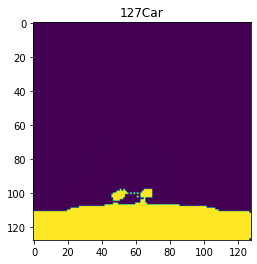

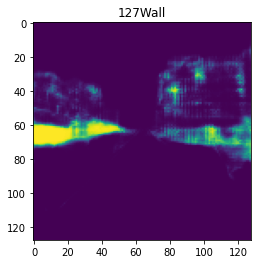

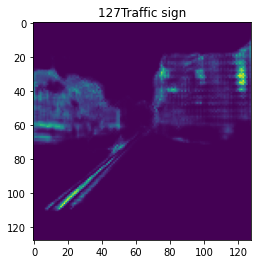

In [36]:
for e in range(13):
  sample_img = p[32]
  mask = np.zeros((128, 128, 3))
  mask = sample_img[:, :, e]
  for i in range(128):
    for j in range(128):
      if mask[i][j] == 1:
        mask[i][j] = 255

  plt.title(f'{i}{labels[e]}')
  plt.imshow(mask)
  plt.show()

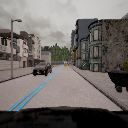

In [37]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_val[32])

In [38]:
sample_img = p[32]
print(sample_img[:, : ,7])

[[8.6807445e-02 3.8392171e-02 2.9411828e-02 ... 2.3912203e-02
  5.0123345e-02 7.1324781e-02]
 [3.6250353e-02 8.1260921e-03 8.5807303e-03 ... 5.0423201e-03
  1.6610460e-02 4.0735852e-02]
 [2.9110583e-02 5.1360284e-03 3.4956378e-03 ... 2.9929981e-03
  1.0108926e-02 2.0860540e-02]
 ...
 [9.9999511e-01 2.5500000e+02 2.5500000e+02 ... 9.9999952e-01
  9.9998915e-01 9.9814045e-01]
 [9.9999774e-01 2.5500000e+02 2.5500000e+02 ... 9.9999821e-01
  9.9995208e-01 9.9746263e-01]
 [9.9992883e-01 2.5500000e+02 2.5500000e+02 ... 9.9968445e-01
  9.9908948e-01 9.8414880e-01]]


In [39]:
sample_img = p[32]
mask = np.zeros((128, 128))
mask = sample_img[:, :, 7]

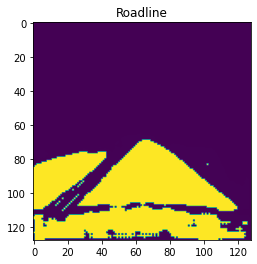

In [40]:
for i in range(128):
  for j in range(128):
    if mask[i][j] == 1:
      mask[i][j] = 255

plt.title(f'{labels[6]}')
plt.imshow(mask)

[[ 165  128   75   76]
 [-469  128  -42   76]]


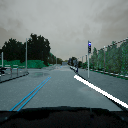

In [48]:
n = 35
img = X_val[n]
pred_mask = p[n]
lane_mask = np.zeros((128, 128))
lane_mask = pred_mask[:, :, 7]

for i in range(128):
  for j in range(128):
    if lane_mask[i][j] == 1:      # highest predicted pixel will be only showm
      lane_mask[i][j] = 255

img_copy = np.copy(img)
blur = cv2.Sobel(lane_mask ,cv2.CV_64F,1,0,ksize=5)
blur_copy = np.uint8(blur)
lines = cv2.HoughLinesP(blur_copy, 2, np.pi/180, threshold = 100, maxLineGap = 5, minLineLength = 60)
if lines is not None:
  averaged_lines = average_slope_intercept(lane_mask, lines)
  print(averaged_lines)
  for line in averaged_lines:
    x1, y1, x2, y2 = line.reshape(4)
    cv2.line(img_copy , (x1, y1), (x2, y2), (255, 255, 255), thickness = 2)

cv2_imshow(img_copy)